In [43]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [44]:
shots = 8192

def deutsch_algorithm(oracle):
    """
    Implements Deutsch's algorithm using the given oracle.
    
    Parameters:
    oracle (QuantumCircuit): A quantum circuit implementing the oracle function f(x).
    
    Returns:
    str: 'constant' if f(x) is constant, 'balanced' if f(x) is balanced.
    """
    qubit_x = QuantumRegister(1, name='qubit_x') 
    qubit_y = QuantumRegister(1, name='qubit_y')

    measure_x = ClassicalRegister(1, name='measure_x')
    measure_Fx = ClassicalRegister(1, name='measure_Fx')

    # Create a 2-qubit quantum circuit
    qc = QuantumCircuit(qubit_x, qubit_y, measure_x)
    
    # Initialize the qubits
    qc.x(1)  # Apply X gate to the second qubit
    qc.barrier()
    
    qc.h([0, 1])  # Apply Hadamard gate to both qubits
    
    # Apply the oracle
    qc.append(oracle.to_gate(), [0, 1])
    
    # Apply Hadamard to the first qubit again
    qc.h(0)
    
    # Measure the first qubit
    qc.barrier()
    qc.measure(qubit_x, measure_x)

    # Measure the second qubit associated to y + f(x)
    qc_copy = qc.copy()
    qc_copy.add_register(measure_Fx)
    qc_copy.measure(qubit_y, measure_Fx)

    display(qc_copy.draw('mpl'))

    # Simulate the circuit
    simulator = AerSimulator()
    result_x = simulator.run(qc.decompose(reps=1), shots=shots).result()
    counts_x = result_x.get_counts()

    results = simulator.run(qc_copy.decompose(reps=1), shots=shots).result()
    total_counts = results.get_counts()

    print(counts_x)
    print(total_counts)

    display(plot_distribution(total_counts))
    
    # Determine if f(x) is constant or balanced
    return 'constant' if '0' in counts_x and counts_x['0'] > counts_x.get('1', 0) else 'balanced'


In [45]:
# Define oracle functions

def constant_oracle():
    """ Creates a quantum oracle for a constant function f(x) = 0. """
    oracle = QuantumCircuit(2, name="  f(x) = 0  ")
    return oracle

def balanced_oracle():
    """ Creates a quantum oracle for a balanced function f(x) = x. """
    oracle = QuantumCircuit(2, name="  f(x) = 1  ")
    oracle.cx(0, 1)
    return oracle

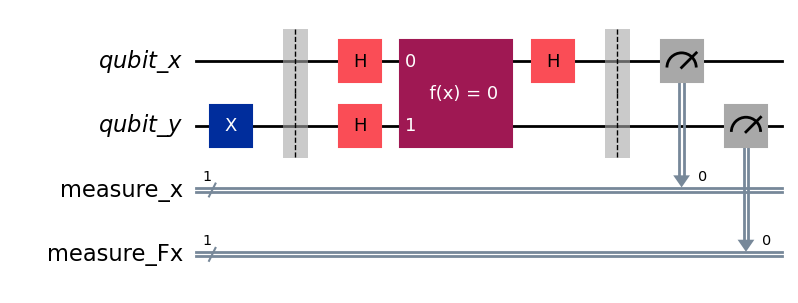

{'0': 8192}
{'1 0': 4064, '0 0': 4128}


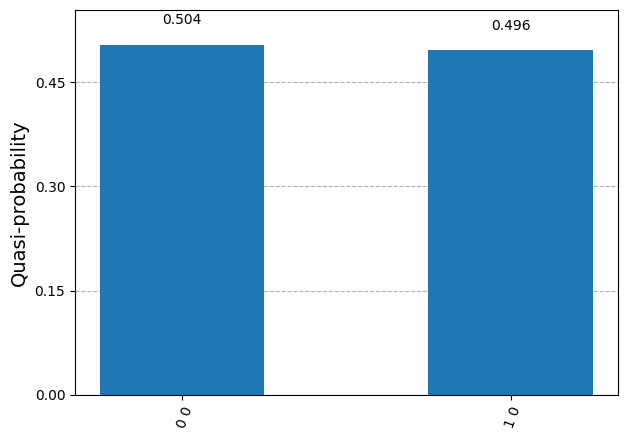

Testing constant oracle: constant


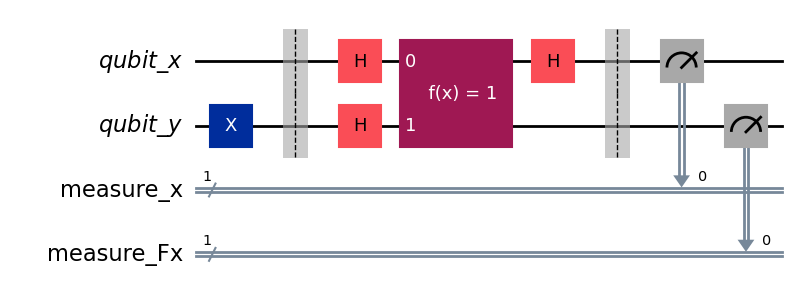

{'1': 8192}
{'1 1': 4054, '0 1': 4138}


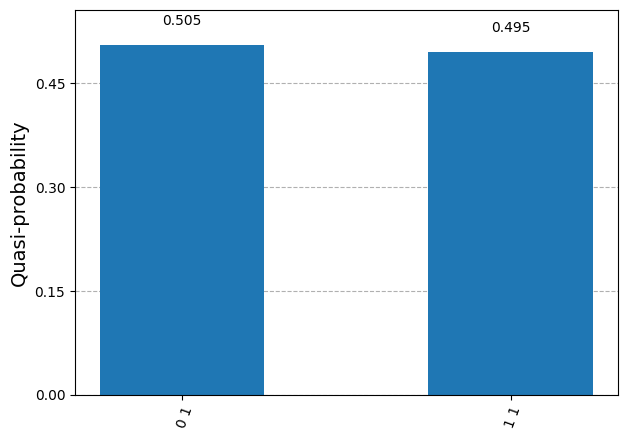

Testing balanced oracle: balanced


In [46]:
# Test the algorithm
print("Testing constant oracle:", deutsch_algorithm(constant_oracle()))
print("Testing balanced oracle:", deutsch_algorithm(balanced_oracle()))